Rainfall Prediction - Weather Forecasting
Problem Statement:
Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".



import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

a)we have to predict whether or not it will rain tomorrow.
b)predict how much rainfall could be there.

In [2]:
df=pd.read_csv('Rainfall.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.shape

(8425, 23)

The dataset consist of 8425 rows and 23 columns

In [4]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

The dataset consist of object and float type of data 

In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

There are 23 columns

In [6]:



df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

Thre is null values present in the data and float type of data is present in 16 columns and object type of data is present in 7 columns

# EDA

In [7]:
#checking for null values
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [8]:
# To know how much percentage the data is being missed
df.isnull().sum()/len(df)

Date             0.000000
Location         0.000000
MinTemp          0.008902
MaxTemp          0.007122
Rainfall         0.028487
Evaporation      0.416855
Sunshine         0.474065
WindGustDir      0.117626
WindGustSpeed    0.117626
WindDir9am       0.098398
WindDir3pm       0.036558
WindSpeed9am     0.009021
WindSpeed3pm     0.012700
Humidity9am      0.007003
Humidity3pm      0.012107
Pressure9am      0.155371
Pressure3pm      0.155727
Cloud9am         0.287359
Cloud3pm         0.291395
Temp9am          0.006647
Temp3pm          0.011395
RainToday        0.028487
RainTomorrow     0.028368
dtype: float64

Evoporation,Sunshine columns having null values of above 40%
Cloud 9am and Aloud 3pm having null value of above 25%
we can drop those columns as we can not fill that much of data by mean/median/mode of that columns

In [9]:

df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.720955,0.091642,0.348643,0.081365,0.241317,0.137263,0.180091,-0.130906,0.079569,-0.465478,-0.458665,0.111213,0.046889,0.888342,0.689652
MaxTemp,0.720955,1.000000,-0.088906,0.424728,0.523909,0.146113,0.013425,0.088797,-0.392496,-0.424217,-0.347285,-0.430074,-0.307700,-0.301675,0.869503,0.978665
Rainfall,0.091642,-0.088906,1.000000,0.043463,-0.209654,0.104999,0.051349,0.025185,0.231702,0.238730,-0.080412,-0.037270,0.195157,0.159250,-0.007191,-0.092263
Evaporation,0.348643,0.424728,0.043463,1.000000,0.340893,0.214069,0.176701,0.142421,-0.286869,-0.221244,-0.218171,-0.233401,-0.084288,-0.152637,0.405467,0.414156
Sunshine,0.081365,0.523909,-0.209654,0.340893,1.000000,-0.018455,-0.025112,0.045031,-0.512349,-0.630536,0.028666,-0.047098,-0.705577,-0.723957,0.348708,0.546057
WindGustSpeed,0.241317,0.146113,0.104999,0.214069,-0.018455,1.000000,0.656079,0.711403,-0.286045,-0.097380,-0.430736,-0.394745,0.030124,0.104157,0.211477,0.106872
WindSpeed9am,0.137263,0.013425,0.051349,0.176701,-0.025112,0.656079,1.000000,0.566322,-0.358981,-0.111595,-0.197189,-0.156517,-0.000607,0.068930,0.109936,-0.002619
WindSpeed3pm,0.180091,0.088797,0.025185,0.142421,0.045031,0.711403,0.566322,1.000000,-0.252488,-0.091248,-0.291271,-0.240378,0.005807,0.003894,0.185329,0.066201
Humidity9am,-0.130906,-0.392496,0.231702,-0.286869,-0.512349,-0.286045,-0.358981,-0.252488,1.000000,0.636255,0.154699,0.188463,0.472126,0.352736,-0.378389,-0.383788
Humidity3pm,0.079569,-0.424217,0.238730,-0.221244,-0.630536,-0.097380,-0.111595,-0.091248,0.636255,1.000000,0.001763,0.076002,0.509797,0.520221,-0.130973,-0.491634


In [10]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


describe method tells statistical information of the data as there is a large gap between 75% value of 'Rainfall' and max value,and in Evaporation,wind_GustSpeed also.may be some outliers present in the data

In [11]:
df.describe(include=[object])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,8425,8425,7434,7596,8117,8185,8186
unique,3004,12,16,16,16,2,2
top,2011-06-24,Melbourne,N,N,SE,No,No
freq,5,1622,713,906,813,6195,6195


There are 3004 unique date values present in the dataset and 12 unique Locations are present,RainToday,RainTomorrow has 2 unique values

In [12]:
#Date column is of object we have to change it
df['Date']=pd.to_datetime(df['Date'])
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day



In [13]:
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
year                      int64
month                     int64
day                       int64
dtype: object

In [14]:
# Date is not useful in predicting the rainfall so we can drop this column
df.drop('Date',axis=1,inplace=True)

In [15]:
# Handling null values
# splitting the data into categeorical and numerical 
categeorical_features=df.select_dtypes(include=['object'])
categeorical_features.head(5)

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


There are 6 categeorical columns

In [16]:
df['WindGustDir'].fillna(value=df['WindGustDir'].mode()[0],inplace=True)

In [17]:
df['WindDir9am'].fillna(value=df['WindDir9am'].mode()[0],inplace=True)

In [18]:
df['WindDir3pm'].fillna(value=df['WindDir3pm'].mode()[0],inplace=True)

In [19]:
df['RainToday'].fillna(value=df['RainToday'].mode()[0],inplace=True)

In [20]:
df['RainTomorrow'].fillna(value=df['RainTomorrow'].mode()[0],inplace=True)

In [21]:
numerical_features=[col_name for col_name in df.columns if df[col_name].dtype!='object']
df[numerical_features].isnull().sum()

MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustSpeed     991
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
year                0
month               0
day                 0
dtype: int64


There are 17 columns with numerical data

In [22]:
#filling numerical data null values with mean values of that column
for i in df[numerical_features]:
    df[i].fillna(value=df[i].mean(),inplace=True)
    

In [23]:
df[numerical_features].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
year             0
month            0
day              0
dtype: int64

In [24]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
year             0
month            0
day              0
dtype: int64

There is no null values present in the data 

<AxesSubplot:>

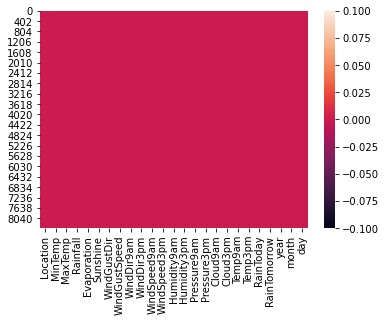

In [25]:
sns.heatmap(df.isnull())

There is no missing data present in the dataset

# Data Visualization

<AxesSubplot:>

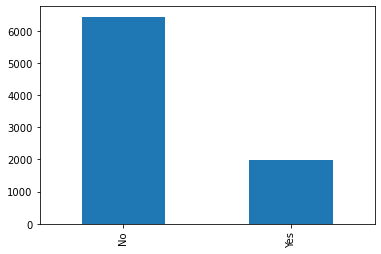

In [26]:
df['RainTomorrow'].value_counts().plot.bar()


Target variable is imbalance means There is more No values than yes values

<AxesSubplot:xlabel='Sunshine', ylabel='RainTomorrow'>

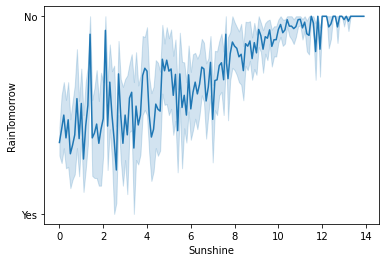

In [27]:
sns.lineplot(x='Sunshine',y='RainTomorrow',data=df)


# visualizing categeorical features

<AxesSubplot:title={'center':'WindDir3pm'}>

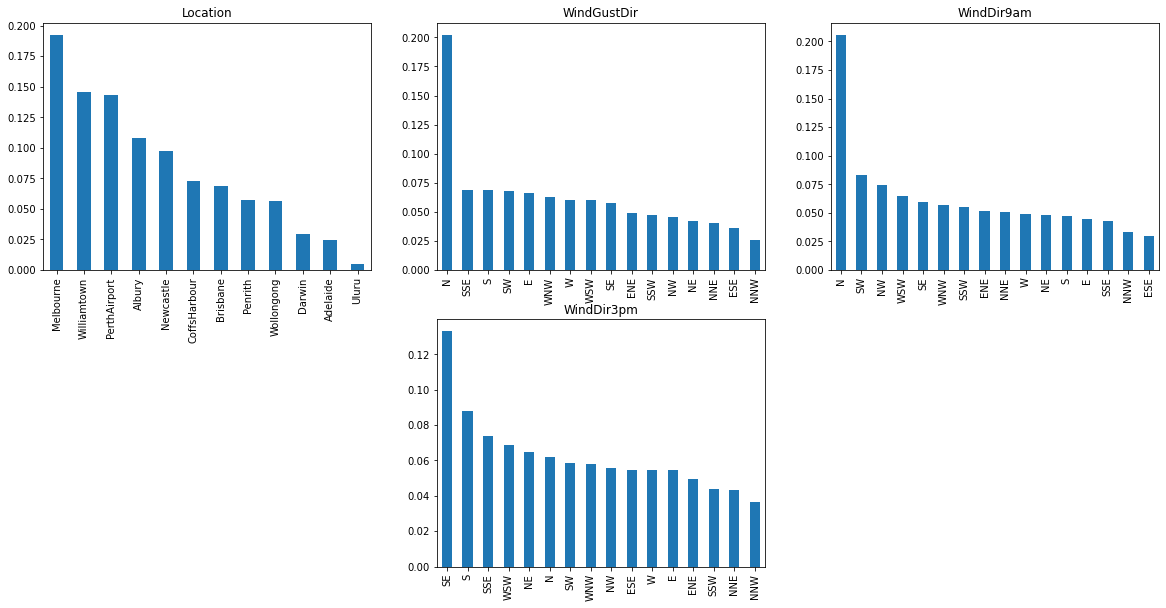

In [28]:

plt.subplot(231)
df['Location'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Location')

plt.subplot(232)
df['WindGustDir'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='WindGustDir')


plt.subplot(233)
df['WindDir9am'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='WindDir9am')

plt.subplot(235)
df['WindDir3pm'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='WindDir3pm')

In [29]:
df['WindDir9am'].value_counts()

N      1735
SW      704
NW      625
WSW     543
SE      505
WNW     480
SSW     467
ENE     433
NNE     430
W       414
NE      409
S       402
E       380
SSE     365
NNW     280
ESE     253
Name: WindDir9am, dtype: int64


'Melbourne' city has highest value
'WindGustDir' is mostly to the North side
WindDirection at 9am towards North only most of the times
WindDirection at 3pm towards SouthEast and to South most of the times


# Visualization of numerical data

In [30]:
df[numerical_features].dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustSpeed    float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
year               int64
month              int64
day                int64
dtype: object

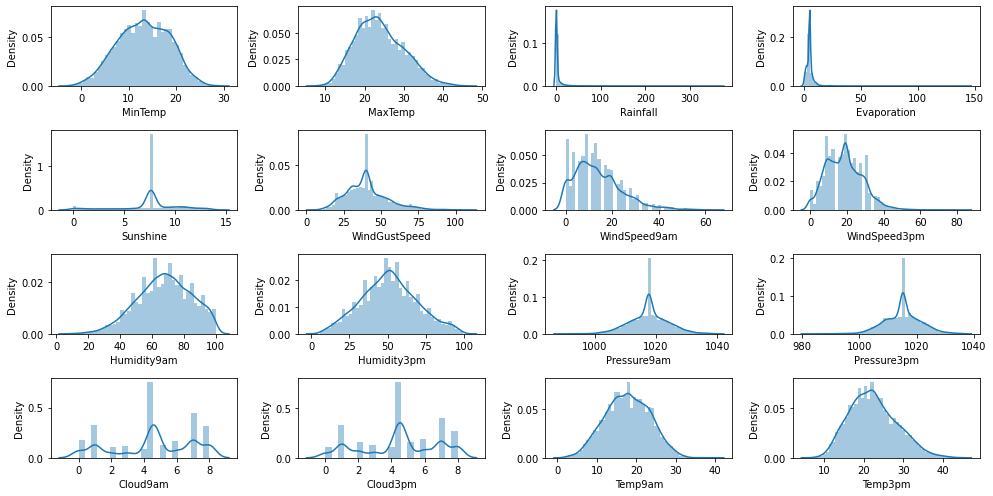

In [31]:
a=4 # no.of rows
b=4 # no. of columns
c=1 # initialization plot counter

plt.figure(figsize=(14,7))
for i in df:
    if df[i].dtype=='float64':
        plt.subplot(a,b,c)
        sns.distplot(df[i])
        c=c+1
    else:
        continue
plt.tight_layout()
plt.show()
        

AMinTemp,MaxTemp,Humidity3pm,Temp9am,Temp3pm are normally distributed
Cloud9am,cloud3pm are left skewed

# Bivariate Analysis

RainToday       No  Yes
Location               
Adelaide       161   44
Albury         708  199
Brisbane       444  135
CoffsHarbour   424  187
Darwin         217   33
Melbourne     1218  404
Newcastle      624  198
Penrith        366  116
PerthAirport   962  242
Uluru           39    0
Williamtown    924  306
Wollongong     348  126


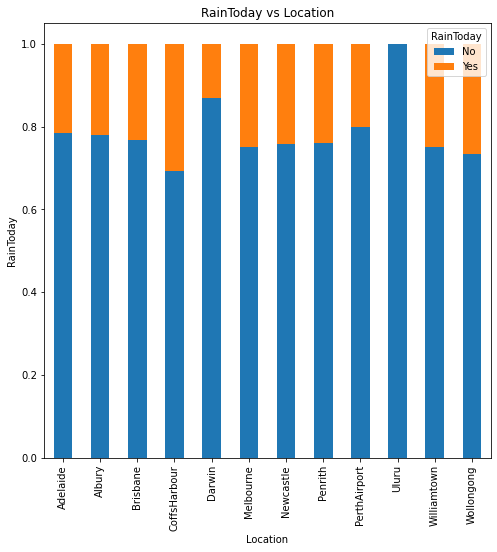

In [32]:
g=pd.crosstab(df['Location'],df['RainToday'])
g.div(g.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(8,8))
plt.xlabel('Location')
plt.ylabel('RainToday')
plt.title('RainToday vs Location')
print(g)

There is highestvalue of no for Melbourne city vs RainfallToday
There is no Rain in uluru

RainToday      No  Yes
WindGustDir           
E             484   73
ENE           354   61
ESE           237   65
N            1371  333
NE            289   64
NNE           279   64
NNW           179   40
NW            298   85
S             389  188
SE            369  115
SSE           428  150
SSW           278  118
SW            382  190
W             368  139
WNW           401  130
WSW           329  175


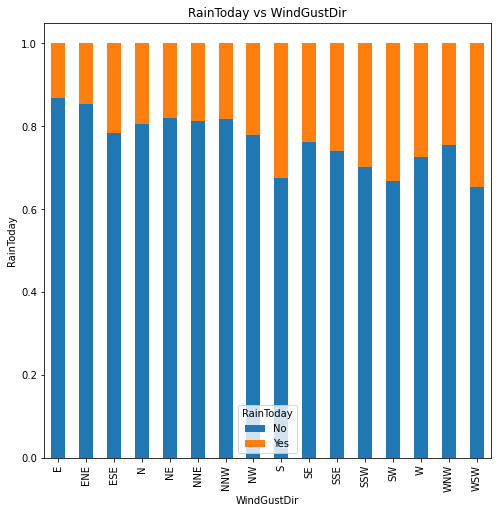

In [33]:
g=pd.crosstab(df['WindGustDir'],df['RainToday'])
g.div(g.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(8,8))
plt.xlabel('WindGustDir')
plt.ylabel('RainToday')
plt.title('RainToday vs WindGustDir')
print(g)

WindGstDir having highest values towards North

RainToday     No  Yes
WindDir9am           
E            336   44
ENE          385   48
ESE          197   56
N           1380  355
NE           347   62
NNE          343   87
NNW          222   58
NW           517  108
S            297  105
SE           408   97
SSE          281   84
SSW          305  162
SW           461  243
W            261  153
WNW          353  127
WSW          342  201


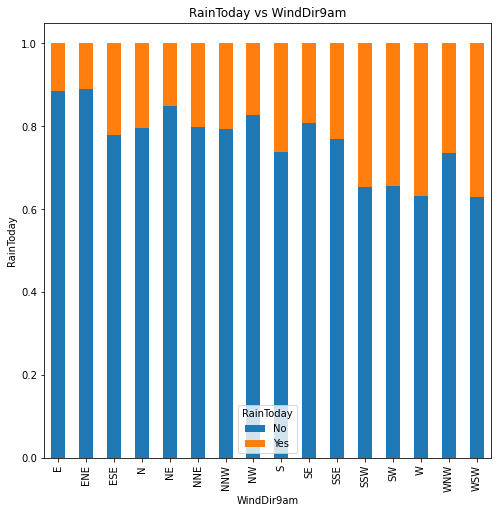

In [34]:

g=pd.crosstab(df['WindDir9am'],df['RainToday'])
g.div(g.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(8,8))
plt.xlabel('WindDir9am')
plt.ylabel('RainToday')
plt.title('RainToday vs WindDir9am')
print(g)

Wind Direction is towards North at 9am
Wind Direction is towards west will have RainToday Highest yes values,means rainwill fall towards west side cities 

Text(0.5, 1.0, 'RainToday vs WindDir3pm')

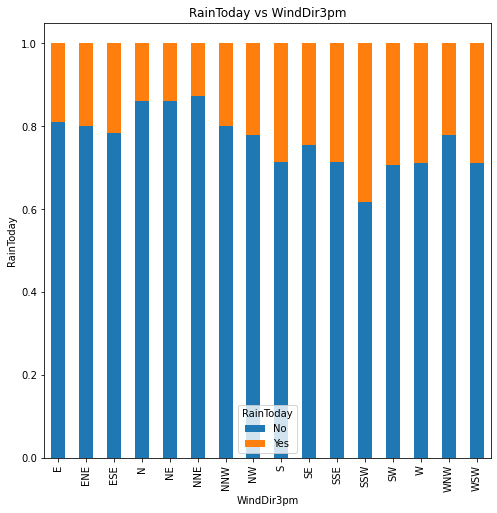

In [35]:
g=pd.crosstab(df['WindDir3pm'],df['RainToday'])
g.div(g.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(8,8))
plt.xlabel('WindDir3pm')
plt.ylabel('RainToday')
plt.title('RainToday vs WindDir3pm')

RainToday will come to SSW more and No for NorthEast more

 13.193305    75
 12.000000    74
 13.200000    71
 13.800000    69
 12.700000    68
              ..
 26.900000     1
-1.700000      1
-1.400000      1
-1.200000      1
-0.800000      1
Name: MinTemp, Length: 286, dtype: int64

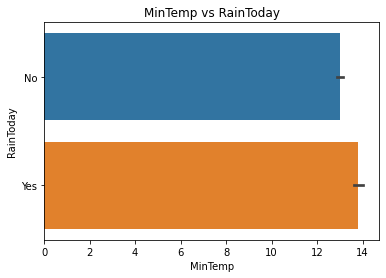

In [36]:
sns.barplot(x='MinTemp',y='RainToday',data=df)
plt.title('MinTemp vs RainToday')
df['MinTemp'].value_counts()


MinTemp having Highest yes values upto 13

19.0    87
23.8    75
19.8    74
25.0    71
22.3    68
        ..
44.9     1
10.0     1
43.1     1
40.6     1
10.7     1
Name: MaxTemp, Length: 332, dtype: int64

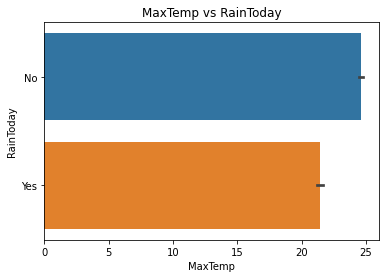

In [37]:
sns.barplot(x='MaxTemp',y='RainToday',data=df)
plt.title('MaxTemp vs RainToday')
df['MaxTemp'].value_counts()

If There is a maximum temperature there is no RainToday

7.632205     3994
0.000000      166
11.100000      68
11.200000      67
11.000000      66
             ... 
2.500000        8
13.600000       7
13.800000       4
13.900000       3
13.500000       2
Name: Sunshine, Length: 141, dtype: int64

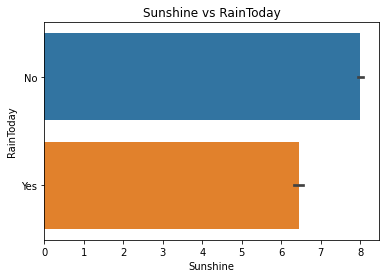

In [38]:
sns.barplot(x='Sunshine',y='RainToday',data=df)
plt.title('Sunshine vs RainToday')
df['Sunshine'].value_counts()

If There is more sunshine there is no raintoday i.e mostvalues are plotted at No

14.8    77
18.0    73
18.3    71
17.5    69
20.6    68
        ..
1.9      1
31.2     1
36.8     1
32.7     1
2.5      1
Name: Temp9am, Length: 305, dtype: int64

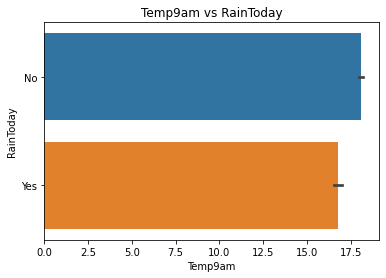

In [39]:
sns.barplot(x='Temp9am',y='RainToday',data=df)
plt.title('Temp9am vs RainToday')
df['Temp9am'].value_counts()

Temparature at 9am is consist of highest values means No RainToday

Text(0.5, 1.0, 'Temp3pm vs RainToday')

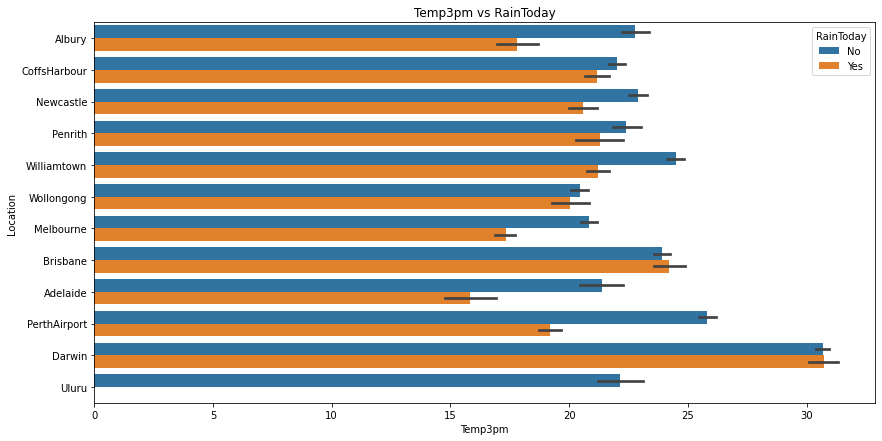

In [40]:
plt.figure(figsize=(14,7))
sns.barplot(x='Temp3pm',y='Location',hue='RainToday',data=df)
plt.title('Temp3pm vs RainToday')


Darwin city has Highest Temperature at 3pm

In [41]:
df.groupby('Location')['Temp3pm'].mean()

Location
Adelaide        20.189756
Albury          21.673539
Brisbane        23.976141
CoffsHarbour    21.745733
Darwin          30.668000
Melbourne       19.952457
Newcastle       22.324634
Penrith         22.135270
PerthAirport    24.472176
Uluru           22.123077
Williamtown     23.663252
Wollongong      20.322906
Name: Temp3pm, dtype: float64

# correlation

In [42]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,day
MinTemp,1.000000,0.717522,0.087684,0.254965,0.056184,0.230058,0.136872,0.178349,-0.130731,0.079048,-0.429432,-0.422991,0.091604,0.038414,0.887119,0.685520,0.044123,-0.245854,0.009446
MaxTemp,0.717522,1.000000,-0.087451,0.322405,0.378403,0.139998,0.013314,0.088172,-0.390976,-0.421879,-0.325721,-0.403258,-0.253968,-0.250132,0.866039,0.974506,0.119772,-0.163253,0.015608
Rainfall,0.087684,-0.087451,1.000000,0.023517,-0.169432,0.086000,0.050631,0.024791,0.228800,0.235444,-0.072668,-0.033649,0.185444,0.150760,-0.007083,-0.090687,0.006435,-0.012244,-0.013760
Evaporation,0.254965,0.322405,0.023517,1.000000,0.226001,0.136371,0.104294,0.101126,-0.213108,-0.161661,-0.177786,-0.189558,-0.062283,-0.108022,0.305264,0.315109,0.152708,0.004362,0.013597
Sunshine,0.056184,0.378403,-0.169432,0.226001,1.000000,-0.013778,-0.018069,0.030145,-0.360831,-0.440268,0.021887,-0.035863,-0.533391,-0.547304,0.250640,0.395324,0.065374,-0.006694,0.004662
WindGustSpeed,0.230058,0.139998,0.086000,0.136371,-0.013778,1.000000,0.600198,0.634939,-0.269593,-0.091860,-0.407139,-0.372651,0.023313,0.078631,0.202298,0.102199,-0.042402,0.051968,-0.002876
WindSpeed9am,0.136872,0.013314,0.050631,0.104294,-0.018069,0.600198,1.000000,0.560660,-0.358391,-0.110587,-0.174679,-0.138454,-0.000549,0.058198,0.109798,-0.002606,-0.088489,0.038427,-0.003067
WindSpeed3pm,0.178349,0.088172,0.024791,0.101126,0.030145,0.634939,0.560660,1.000000,-0.250953,-0.091004,-0.251697,-0.207544,0.005061,0.003295,0.184188,0.066087,-0.051466,0.049483,-0.008957
Humidity9am,-0.130731,-0.390976,0.228800,-0.213108,-0.360831,-0.269593,-0.358391,-0.250953,1.000000,0.633291,0.142374,0.173415,0.404742,0.296862,-0.378344,-0.382401,0.099717,-0.115530,0.003799
Humidity3pm,0.079048,-0.421879,0.235444,-0.161661,-0.440268,-0.091860,-0.110587,-0.091004,0.633291,1.000000,0.001629,0.070369,0.424348,0.439965,-0.130414,-0.491485,-0.028920,-0.074256,0.012512


<AxesSubplot:>

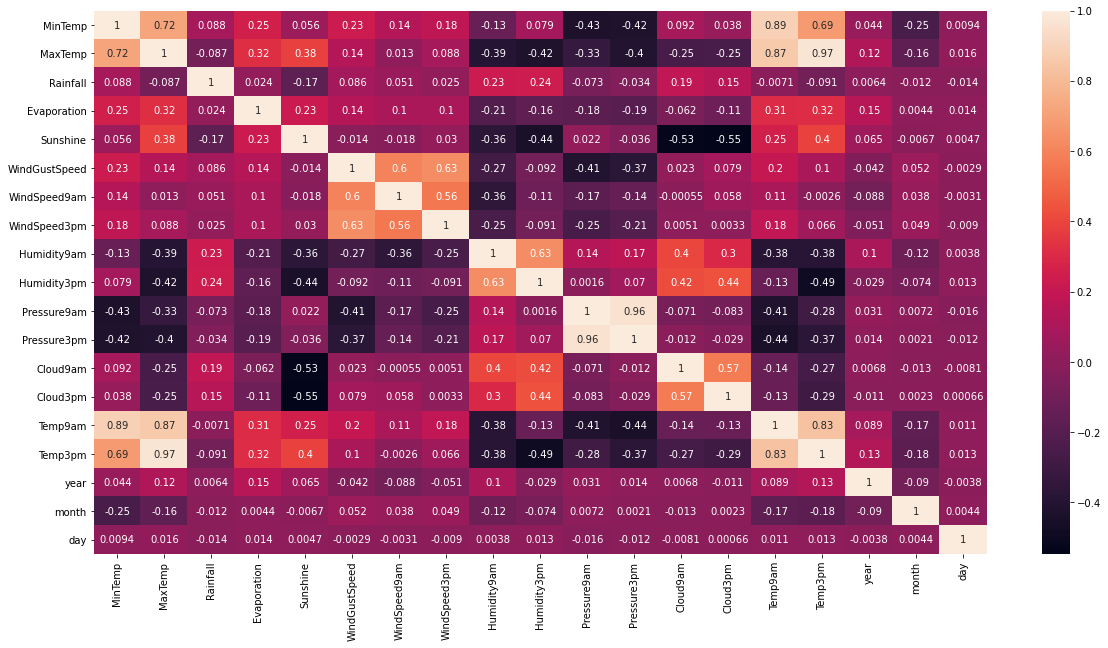

In [43]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

MinTemp is 89 % correlated with Temp9am,69%correlated with Temp3pm 72% with Maxtemp
MaxTemp is 97% correlated with Temp3pm,87% correlated with Temp9am, 32% with Evaporation and 36% with Sunshine
Rainfall is 23% correlated with Humidity9am,24% with Humidity3pm

In [44]:
df.skew()

MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.218403
Evaporation      14.023948
Sunshine         -0.716525
WindGustSpeed     0.757000
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
year              0.418663
month             0.039388
day               0.004260
dtype: float64

Evoparation is having the highest skew value

# Outliers Checking

MinTemp             AxesSubplot(0.125,0.125;0.034292x0.755)
MaxTemp           AxesSubplot(0.16615,0.125;0.034292x0.755)
Rainfall         AxesSubplot(0.207301,0.125;0.034292x0.755)
Evaporation      AxesSubplot(0.248451,0.125;0.034292x0.755)
Sunshine         AxesSubplot(0.289602,0.125;0.034292x0.755)
WindGustSpeed    AxesSubplot(0.330752,0.125;0.034292x0.755)
WindSpeed9am     AxesSubplot(0.371903,0.125;0.034292x0.755)
WindSpeed3pm     AxesSubplot(0.413053,0.125;0.034292x0.755)
Humidity9am      AxesSubplot(0.454204,0.125;0.034292x0.755)
Humidity3pm      AxesSubplot(0.495354,0.125;0.034292x0.755)
Pressure9am      AxesSubplot(0.536504,0.125;0.034292x0.755)
Pressure3pm      AxesSubplot(0.577655,0.125;0.034292x0.755)
Cloud9am         AxesSubplot(0.618805,0.125;0.034292x0.755)
Cloud3pm         AxesSubplot(0.659956,0.125;0.034292x0.755)
Temp9am          AxesSubplot(0.701106,0.125;0.034292x0.755)
Temp3pm          AxesSubplot(0.742257,0.125;0.034292x0.755)
year             AxesSubplot(0.783407,0.

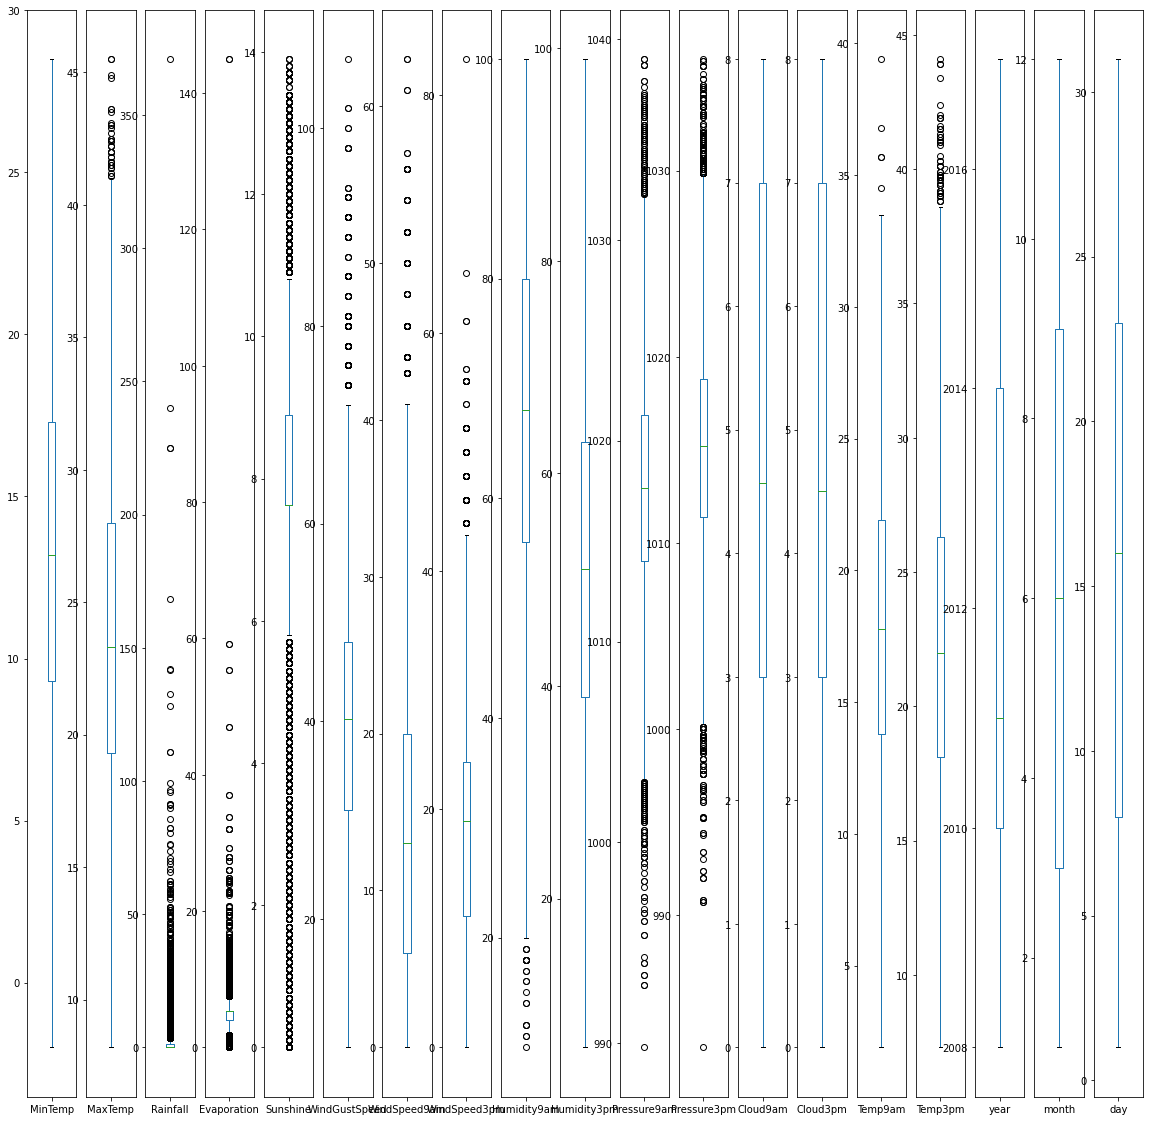

In [45]:
df.plot(kind='box',subplots=True,figsize=(20,20))

MaxTemp,Evaporation,SunShine,windGustSpeed3pm,Humidity9am,pressure9am,pressure3pm,Temp3pm having outliers

# Encoding the DataFrame

The data consist of categeorical data we have to conver into numerical,we use LabelEncoder

In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,1,13.4,22.900000,0.6,5.389395,7.632205,13,44.000000,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,2008,12,1
1,1,7.4,25.100000,0.0,5.389395,7.632205,14,44.000000,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2008,12,2
2,1,12.9,25.700000,0.0,5.389395,7.632205,15,46.000000,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,2008,12,3
3,1,9.2,28.000000,0.0,5.389395,7.632205,4,24.000000,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,2008,12,4
4,1,17.5,32.300000,1.0,5.389395,7.632205,13,41.000000,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,0.0,5.389395,7.632205,0,31.000000,9,1,...,1020.3,4.566622,4.503183,10.1,22.4,0,0,2017,6,21
8421,9,3.6,25.300000,0.0,5.389395,7.632205,6,22.000000,9,3,...,1019.1,4.566622,4.503183,10.9,24.5,0,0,2017,6,22
8422,9,5.4,26.900000,0.0,5.389395,7.632205,3,37.000000,9,14,...,1016.8,4.566622,4.503183,12.5,26.1,0,0,2017,6,23
8423,9,7.8,27.000000,0.0,5.389395,7.632205,9,28.000000,10,3,...,1016.5,3.000000,2.000000,15.1,26.0,0,0,2017,6,24


# Removing Outliers

In [47]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  12,   12,   44,   44,   52,   52,   60,   60,   61,   61,   62,
          62,   62,   67,   68,   68,  123,  267,  296,  381,  381,  405,
         406,  407,  407,  431,  462,  563,  568,  568,  569,  602,  683,
         683,  699,  713,  748,  748,  770,  796,  797,  802,  928,  935,
         949,  979,  980,  980,  980, 1008, 1009, 1011, 1138, 1148, 1149,
        1151, 1189, 1202, 1203, 1237, 1241, 1264, 1265, 1357, 1411, 1412,
        1413, 1479, 1480, 1481, 1513, 1535, 1587, 1644, 1661, 1665, 1673,
        1680, 1774, 1819, 1873, 1898, 1903, 1945, 2016, 2028, 2043, 2063,
        2074, 2108, 2116, 2186, 2201, 2219, 2219, 2230, 2231, 2265, 2429,
        2488, 2500, 2505, 2527, 2527, 2541, 2593, 2676, 2677, 2735, 2827,
        2835, 2849, 2849, 2855, 2859, 2863, 2869, 2877, 2883, 2890, 2891,
        2897, 2898, 2900, 2901, 2905, 2909, 2911, 2919, 2925, 2933, 2939,
        2947, 2953, 2961, 2967, 2975, 2989, 3003, 3051, 3051, 3058, 3059,
        3059, 3060, 3066, 3067, 3067, 

In [48]:
df_new=df[(z<3).all(axis=1)]

In [49]:
df_new.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,1,13.4,22.9,0.6,5.389395,7.632205,13,44.0,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,2008,12,1
1,1,7.4,25.1,0.0,5.389395,7.632205,14,44.0,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2008,12,2
2,1,12.9,25.7,0.0,5.389395,7.632205,15,46.0,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,2008,12,3
3,1,9.2,28.0,0.0,5.389395,7.632205,4,24.0,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,2008,12,4
4,1,17.5,32.3,1.0,5.389395,7.632205,13,41.0,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,2008,12,5


In [50]:
print("OldDataFrame",df.shape)
print("newdataframe",df_new.shape)
print("Totaldroppedrows",df.shape[0]-df_new.shape[0])


OldDataFrame (8425, 25)
newdataframe (7987, 25)
Totaldroppedrows 438


In [51]:
print("OldDataFrame",df.shape)
print("NewDataFrame",df_new.shape)
print("TotalDroppedRows",df.shape[0]-df_new.shape[0])

OldDataFrame (8425, 25)
NewDataFrame (7987, 25)
TotalDroppedRows 438


In [52]:
df_new.skew()

Location        -0.040284
MinTemp         -0.084549
MaxTemp          0.314510
Rainfall         3.488446
Evaporation      0.846181
Sunshine        -0.723970
WindGustDir      0.112339
WindGustSpeed    0.506897
WindDir9am       0.160081
WindDir3pm      -0.126255
WindSpeed9am     0.711395
WindSpeed3pm     0.300109
Humidity9am     -0.231656
Humidity3pm      0.125150
Pressure9am      0.020735
Pressure3pm      0.044876
Cloud9am        -0.356892
Cloud3pm        -0.266829
Temp9am         -0.038035
Temp3pm          0.334170
RainToday        1.301170
RainTomorrow     1.296077
year             0.430100
month            0.054460
day              0.002731
dtype: float64

# Seperating the columns into features and target

In [53]:
x=df_new.drop(['RainTomorrow'],axis=1)
y=df_new['RainTomorrow']

# Transforming data to remove skewness

In [54]:
#Here we are using power transformation for removing skewness
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-1.56842088e+00,  6.05015740e-02, -7.57272296e-02, ...,
        -2.43360887e-13,  1.52402297e+00, -1.88561220e+00],
       [-1.56842088e+00, -1.05725282e+00,  2.87144714e-01, ...,
        -2.43360887e-13,  1.52402297e+00, -1.70313123e+00],
       [-1.56842088e+00, -3.22219600e-02,  3.82999789e-01, ...,
        -2.43360887e-13,  1.52402297e+00, -1.53666415e+00],
       ...,
       [ 1.01632853e+00, -1.43299533e+00,  5.71022930e-01, ...,
         2.91655589e-13, -4.67179920e-02,  8.36217054e-01],
       [ 1.01632853e+00, -9.82333711e-01,  5.86477671e-01, ...,
         2.91655589e-13, -4.67179920e-02,  9.34619493e-01],
       [ 1.01632853e+00,  3.38295674e-01,  8.49017248e-02, ...,
         2.91655589e-13, -4.67179920e-02,  1.03196621e+00]])

In [55]:
pd.DataFrame(x).skew()

0    -0.184130
1    -0.104134
2    -0.014687
3     0.913570
4     0.074744
5    -0.066262
6    -0.190268
7     0.003128
8    -0.160087
9    -0.249775
10   -0.111481
11   -0.076708
12   -0.063948
13   -0.036039
14   -0.000025
15   -0.000421
16   -0.280736
17   -0.218724
18   -0.055798
19   -0.013337
20    1.301170
21    0.000000
22   -0.149530
23   -0.213217
dtype: float64

### Scaling the dat using StandardScaler

In [56]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.56842088,  0.06050157, -0.07572723, ..., -1.66757678,
         1.52402297, -1.8856122 ],
       [-1.56842088, -1.05725282,  0.28714471, ..., -1.66757678,
         1.52402297, -1.70313123],
       [-1.56842088, -0.03222196,  0.38299979, ..., -1.66757678,
         1.52402297, -1.53666415],
       ...,
       [ 1.01632853, -1.43299533,  0.57102293, ...,  1.99906255,
        -0.04671799,  0.83621705],
       [ 1.01632853, -0.98233371,  0.58647767, ...,  1.99906255,
        -0.04671799,  0.93461949],
       [ 1.01632853,  0.33829567,  0.08490172, ...,  1.99906255,
        -0.04671799,  1.03196621]])

# checking VIF

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif["features"]=pd.DataFrame(x).columns
vif

,vif,features
0,1.580396,0
1,8.890286,1
2,26.878440,2
3,4.833444,3
4,1.566403,4
5,2.052272,5
6,1.617156,6
7,2.222239,7
8,1.349018,8
9,1.481574,9


dropping the columns with highest vif

In [58]:
x=df_new.drop(['Humidity3pm','Pressure3pm','Cloud3pm'],axis=1,inplace=True)

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(pd.DataFrame(x),i) for i in range(pd.DataFrame(x).shape[1])]
vif["features"]=pd.DataFrame(x).columns
vif

,vif,features


# Model Building

#As our target variable RainTomorrow is an binary type ,so we use classification

In [60]:
x=df_new.drop(['RainTomorrow'],axis=1)
y=df_new['RainTomorrow']

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)
le=LogisticRegression()
for i in range(1,1000):
    le.fit(x_train,y_train)
    pred_train=le.predict(x_train)
    pred_test=le.predict(x_test)
    #if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
    print(f"At Random state {i} the training accuracy is:",accuracy_score(y_train,pred_train))
    print(f"At Random state {i} the testing accuracy is:",accuracy_score(y_test,pred_test))
    print("\n")

At Random state 1 the training accuracy is: 0.8207857254656441
At Random state 1 the testing accuracy is: 0.8166458072590739


At Random state 2 the training accuracy is: 0.8207857254656441
At Random state 2 the testing accuracy is: 0.8166458072590739


At Random state 3 the training accuracy is: 0.8207857254656441
At Random state 3 the testing accuracy is: 0.8166458072590739


At Random state 4 the training accuracy is: 0.8207857254656441
At Random state 4 the testing accuracy is: 0.8166458072590739


At Random state 5 the training accuracy is: 0.8207857254656441
At Random state 5 the testing accuracy is: 0.8166458072590739


At Random state 6 the training accuracy is: 0.8207857254656441
At Random state 6 the testing accuracy is: 0.8166458072590739


At Random state 7 the training accuracy is: 0.8207857254656441
At Random state 7 the testing accuracy is: 0.8166458072590739


At Random state 8 the training accuracy is: 0.8207857254656441
At Random state 8 the testing accuracy is: 0.816

At Random state 65 the training accuracy is: 0.8207857254656441
At Random state 65 the testing accuracy is: 0.8166458072590739


At Random state 66 the training accuracy is: 0.8207857254656441
At Random state 66 the testing accuracy is: 0.8166458072590739


At Random state 67 the training accuracy is: 0.8207857254656441
At Random state 67 the testing accuracy is: 0.8166458072590739


At Random state 68 the training accuracy is: 0.8207857254656441
At Random state 68 the testing accuracy is: 0.8166458072590739


At Random state 69 the training accuracy is: 0.8207857254656441
At Random state 69 the testing accuracy is: 0.8166458072590739


At Random state 70 the training accuracy is: 0.8207857254656441
At Random state 70 the testing accuracy is: 0.8166458072590739


At Random state 71 the training accuracy is: 0.8207857254656441
At Random state 71 the testing accuracy is: 0.8166458072590739


At Random state 72 the training accuracy is: 0.8207857254656441
At Random state 72 the testing ac

At Random state 129 the training accuracy is: 0.8207857254656441
At Random state 129 the testing accuracy is: 0.8166458072590739


At Random state 130 the training accuracy is: 0.8207857254656441
At Random state 130 the testing accuracy is: 0.8166458072590739


At Random state 131 the training accuracy is: 0.8207857254656441
At Random state 131 the testing accuracy is: 0.8166458072590739


At Random state 132 the training accuracy is: 0.8207857254656441
At Random state 132 the testing accuracy is: 0.8166458072590739


At Random state 133 the training accuracy is: 0.8207857254656441
At Random state 133 the testing accuracy is: 0.8166458072590739


At Random state 134 the training accuracy is: 0.8207857254656441
At Random state 134 the testing accuracy is: 0.8166458072590739


At Random state 135 the training accuracy is: 0.8207857254656441
At Random state 135 the testing accuracy is: 0.8166458072590739


At Random state 136 the training accuracy is: 0.8207857254656441
At Random state 13

At Random state 192 the training accuracy is: 0.8207857254656441
At Random state 192 the testing accuracy is: 0.8166458072590739


At Random state 193 the training accuracy is: 0.8207857254656441
At Random state 193 the testing accuracy is: 0.8166458072590739


At Random state 194 the training accuracy is: 0.8207857254656441
At Random state 194 the testing accuracy is: 0.8166458072590739


At Random state 195 the training accuracy is: 0.8207857254656441
At Random state 195 the testing accuracy is: 0.8166458072590739


At Random state 196 the training accuracy is: 0.8207857254656441
At Random state 196 the testing accuracy is: 0.8166458072590739


At Random state 197 the training accuracy is: 0.8207857254656441
At Random state 197 the testing accuracy is: 0.8166458072590739


At Random state 198 the training accuracy is: 0.8207857254656441
At Random state 198 the testing accuracy is: 0.8166458072590739


At Random state 199 the training accuracy is: 0.8207857254656441
At Random state 19

At Random state 255 the training accuracy is: 0.8207857254656441
At Random state 255 the testing accuracy is: 0.8166458072590739


At Random state 256 the training accuracy is: 0.8207857254656441
At Random state 256 the testing accuracy is: 0.8166458072590739


At Random state 257 the training accuracy is: 0.8207857254656441
At Random state 257 the testing accuracy is: 0.8166458072590739


At Random state 258 the training accuracy is: 0.8207857254656441
At Random state 258 the testing accuracy is: 0.8166458072590739


At Random state 259 the training accuracy is: 0.8207857254656441
At Random state 259 the testing accuracy is: 0.8166458072590739


At Random state 260 the training accuracy is: 0.8207857254656441
At Random state 260 the testing accuracy is: 0.8166458072590739


At Random state 261 the training accuracy is: 0.8207857254656441
At Random state 261 the testing accuracy is: 0.8166458072590739


At Random state 262 the training accuracy is: 0.8207857254656441
At Random state 26

At Random state 318 the training accuracy is: 0.8207857254656441
At Random state 318 the testing accuracy is: 0.8166458072590739


At Random state 319 the training accuracy is: 0.8207857254656441
At Random state 319 the testing accuracy is: 0.8166458072590739


At Random state 320 the training accuracy is: 0.8207857254656441
At Random state 320 the testing accuracy is: 0.8166458072590739


At Random state 321 the training accuracy is: 0.8207857254656441
At Random state 321 the testing accuracy is: 0.8166458072590739


At Random state 322 the training accuracy is: 0.8207857254656441
At Random state 322 the testing accuracy is: 0.8166458072590739


At Random state 323 the training accuracy is: 0.8207857254656441
At Random state 323 the testing accuracy is: 0.8166458072590739


At Random state 324 the training accuracy is: 0.8207857254656441
At Random state 324 the testing accuracy is: 0.8166458072590739


At Random state 325 the training accuracy is: 0.8207857254656441
At Random state 32

At Random state 381 the training accuracy is: 0.8207857254656441
At Random state 381 the testing accuracy is: 0.8166458072590739


At Random state 382 the training accuracy is: 0.8207857254656441
At Random state 382 the testing accuracy is: 0.8166458072590739


At Random state 383 the training accuracy is: 0.8207857254656441
At Random state 383 the testing accuracy is: 0.8166458072590739


At Random state 384 the training accuracy is: 0.8207857254656441
At Random state 384 the testing accuracy is: 0.8166458072590739


At Random state 385 the training accuracy is: 0.8207857254656441
At Random state 385 the testing accuracy is: 0.8166458072590739


At Random state 386 the training accuracy is: 0.8207857254656441
At Random state 386 the testing accuracy is: 0.8166458072590739


At Random state 387 the training accuracy is: 0.8207857254656441
At Random state 387 the testing accuracy is: 0.8166458072590739


At Random state 388 the training accuracy is: 0.8207857254656441
At Random state 38

At Random state 444 the training accuracy is: 0.8207857254656441
At Random state 444 the testing accuracy is: 0.8166458072590739


At Random state 445 the training accuracy is: 0.8207857254656441
At Random state 445 the testing accuracy is: 0.8166458072590739


At Random state 446 the training accuracy is: 0.8207857254656441
At Random state 446 the testing accuracy is: 0.8166458072590739


At Random state 447 the training accuracy is: 0.8207857254656441
At Random state 447 the testing accuracy is: 0.8166458072590739


At Random state 448 the training accuracy is: 0.8207857254656441
At Random state 448 the testing accuracy is: 0.8166458072590739


At Random state 449 the training accuracy is: 0.8207857254656441
At Random state 449 the testing accuracy is: 0.8166458072590739


At Random state 450 the training accuracy is: 0.8207857254656441
At Random state 450 the testing accuracy is: 0.8166458072590739


At Random state 451 the training accuracy is: 0.8207857254656441
At Random state 45

At Random state 507 the training accuracy is: 0.8207857254656441
At Random state 507 the testing accuracy is: 0.8166458072590739


At Random state 508 the training accuracy is: 0.8207857254656441
At Random state 508 the testing accuracy is: 0.8166458072590739


At Random state 509 the training accuracy is: 0.8207857254656441
At Random state 509 the testing accuracy is: 0.8166458072590739


At Random state 510 the training accuracy is: 0.8207857254656441
At Random state 510 the testing accuracy is: 0.8166458072590739


At Random state 511 the training accuracy is: 0.8207857254656441
At Random state 511 the testing accuracy is: 0.8166458072590739


At Random state 512 the training accuracy is: 0.8207857254656441
At Random state 512 the testing accuracy is: 0.8166458072590739


At Random state 513 the training accuracy is: 0.8207857254656441
At Random state 513 the testing accuracy is: 0.8166458072590739


At Random state 514 the training accuracy is: 0.8207857254656441
At Random state 51

At Random state 570 the training accuracy is: 0.8207857254656441
At Random state 570 the testing accuracy is: 0.8166458072590739


At Random state 571 the training accuracy is: 0.8207857254656441
At Random state 571 the testing accuracy is: 0.8166458072590739


At Random state 572 the training accuracy is: 0.8207857254656441
At Random state 572 the testing accuracy is: 0.8166458072590739


At Random state 573 the training accuracy is: 0.8207857254656441
At Random state 573 the testing accuracy is: 0.8166458072590739


At Random state 574 the training accuracy is: 0.8207857254656441
At Random state 574 the testing accuracy is: 0.8166458072590739


At Random state 575 the training accuracy is: 0.8207857254656441
At Random state 575 the testing accuracy is: 0.8166458072590739


At Random state 576 the training accuracy is: 0.8207857254656441
At Random state 576 the testing accuracy is: 0.8166458072590739


At Random state 577 the training accuracy is: 0.8207857254656441
At Random state 57

At Random state 633 the training accuracy is: 0.8207857254656441
At Random state 633 the testing accuracy is: 0.8166458072590739


At Random state 634 the training accuracy is: 0.8207857254656441
At Random state 634 the testing accuracy is: 0.8166458072590739


At Random state 635 the training accuracy is: 0.8207857254656441
At Random state 635 the testing accuracy is: 0.8166458072590739


At Random state 636 the training accuracy is: 0.8207857254656441
At Random state 636 the testing accuracy is: 0.8166458072590739


At Random state 637 the training accuracy is: 0.8207857254656441
At Random state 637 the testing accuracy is: 0.8166458072590739


At Random state 638 the training accuracy is: 0.8207857254656441
At Random state 638 the testing accuracy is: 0.8166458072590739


At Random state 639 the training accuracy is: 0.8207857254656441
At Random state 639 the testing accuracy is: 0.8166458072590739


At Random state 640 the training accuracy is: 0.8207857254656441
At Random state 64

At Random state 696 the training accuracy is: 0.8207857254656441
At Random state 696 the testing accuracy is: 0.8166458072590739


At Random state 697 the training accuracy is: 0.8207857254656441
At Random state 697 the testing accuracy is: 0.8166458072590739


At Random state 698 the training accuracy is: 0.8207857254656441
At Random state 698 the testing accuracy is: 0.8166458072590739


At Random state 699 the training accuracy is: 0.8207857254656441
At Random state 699 the testing accuracy is: 0.8166458072590739


At Random state 700 the training accuracy is: 0.8207857254656441
At Random state 700 the testing accuracy is: 0.8166458072590739


At Random state 701 the training accuracy is: 0.8207857254656441
At Random state 701 the testing accuracy is: 0.8166458072590739


At Random state 702 the training accuracy is: 0.8207857254656441
At Random state 702 the testing accuracy is: 0.8166458072590739


At Random state 703 the training accuracy is: 0.8207857254656441
At Random state 70

At Random state 759 the training accuracy is: 0.8207857254656441
At Random state 759 the testing accuracy is: 0.8166458072590739


At Random state 760 the training accuracy is: 0.8207857254656441
At Random state 760 the testing accuracy is: 0.8166458072590739


At Random state 761 the training accuracy is: 0.8207857254656441
At Random state 761 the testing accuracy is: 0.8166458072590739


At Random state 762 the training accuracy is: 0.8207857254656441
At Random state 762 the testing accuracy is: 0.8166458072590739


At Random state 763 the training accuracy is: 0.8207857254656441
At Random state 763 the testing accuracy is: 0.8166458072590739


At Random state 764 the training accuracy is: 0.8207857254656441
At Random state 764 the testing accuracy is: 0.8166458072590739


At Random state 765 the training accuracy is: 0.8207857254656441
At Random state 765 the testing accuracy is: 0.8166458072590739


At Random state 766 the training accuracy is: 0.8207857254656441
At Random state 76

At Random state 822 the training accuracy is: 0.8207857254656441
At Random state 822 the testing accuracy is: 0.8166458072590739


At Random state 823 the training accuracy is: 0.8207857254656441
At Random state 823 the testing accuracy is: 0.8166458072590739


At Random state 824 the training accuracy is: 0.8207857254656441
At Random state 824 the testing accuracy is: 0.8166458072590739


At Random state 825 the training accuracy is: 0.8207857254656441
At Random state 825 the testing accuracy is: 0.8166458072590739


At Random state 826 the training accuracy is: 0.8207857254656441
At Random state 826 the testing accuracy is: 0.8166458072590739


At Random state 827 the training accuracy is: 0.8207857254656441
At Random state 827 the testing accuracy is: 0.8166458072590739


At Random state 828 the training accuracy is: 0.8207857254656441
At Random state 828 the testing accuracy is: 0.8166458072590739


At Random state 829 the training accuracy is: 0.8207857254656441
At Random state 82

At Random state 885 the training accuracy is: 0.8207857254656441
At Random state 885 the testing accuracy is: 0.8166458072590739


At Random state 886 the training accuracy is: 0.8207857254656441
At Random state 886 the testing accuracy is: 0.8166458072590739


At Random state 887 the training accuracy is: 0.8207857254656441
At Random state 887 the testing accuracy is: 0.8166458072590739


At Random state 888 the training accuracy is: 0.8207857254656441
At Random state 888 the testing accuracy is: 0.8166458072590739


At Random state 889 the training accuracy is: 0.8207857254656441
At Random state 889 the testing accuracy is: 0.8166458072590739


At Random state 890 the training accuracy is: 0.8207857254656441
At Random state 890 the testing accuracy is: 0.8166458072590739


At Random state 891 the training accuracy is: 0.8207857254656441
At Random state 891 the testing accuracy is: 0.8166458072590739


At Random state 892 the training accuracy is: 0.8207857254656441
At Random state 89

At Random state 948 the training accuracy is: 0.8207857254656441
At Random state 948 the testing accuracy is: 0.8166458072590739


At Random state 949 the training accuracy is: 0.8207857254656441
At Random state 949 the testing accuracy is: 0.8166458072590739


At Random state 950 the training accuracy is: 0.8207857254656441
At Random state 950 the testing accuracy is: 0.8166458072590739


At Random state 951 the training accuracy is: 0.8207857254656441
At Random state 951 the testing accuracy is: 0.8166458072590739


At Random state 952 the training accuracy is: 0.8207857254656441
At Random state 952 the testing accuracy is: 0.8166458072590739


At Random state 953 the training accuracy is: 0.8207857254656441
At Random state 953 the testing accuracy is: 0.8166458072590739


At Random state 954 the training accuracy is: 0.8207857254656441
At Random state 954 the testing accuracy is: 0.8166458072590739


At Random state 955 the training accuracy is: 0.8207857254656441
At Random state 95



# DecisionTreeClassifier

In [62]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print("Accuracy_score is:",accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))
print("cross_validation_score is:",cross_val_score(dtc,x,y,cv=5).mean())

Accuracy_score is: 0.8204005006257822
[[1069  148]
 [ 139  242]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1217
           1       0.62      0.64      0.63       381

    accuracy                           0.82      1598
   macro avg       0.75      0.76      0.75      1598
weighted avg       0.82      0.82      0.82      1598

cross_validation_score is: 0.7524760521722911


# KNN

In [63]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print("Accuracy is",accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))
print("cross_val_score is",cross_val_score(knn,x,y,cv=5).mean())

Accuracy is 0.8122653316645807
[[1137   80]
 [ 220  161]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1217
           1       0.67      0.42      0.52       381

    accuracy                           0.81      1598
   macro avg       0.75      0.68      0.70      1598
weighted avg       0.80      0.81      0.80      1598

cross_val_score is 0.791661383241262


# SVC

In [64]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy_score is:",accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))
print("cross_val_score is:",cross_val_score(svc,x,y,cv=5).mean())

Accuracy_score is: 0.7615769712140176
[[1217    0]
 [ 381    0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      1217
           1       0.00      0.00      0.00       381

    accuracy                           0.76      1598
   macro avg       0.38      0.50      0.43      1598
weighted avg       0.58      0.76      0.66      1598

cross_val_score is: 0.7718793764591462


# RandomForestClassifier

In [65]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print("Accuracy is",accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))
print("cross_val_score is",cross_val_score(rfc,x,y,cv=5).mean())

Accuracy is 0.8917396745932415
[[1189   28]
 [ 145  236]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1217
           1       0.89      0.62      0.73       381

    accuracy                           0.89      1598
   macro avg       0.89      0.80      0.83      1598
weighted avg       0.89      0.89      0.88      1598

cross_val_score is 0.8282207800451881


# GradientBoostingClassifier

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc=gbc.predict(x_test)
print("Accuracy is",accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))
print("cross_val_score is",cross_val_score(gbc,x,y,cv=5).mean())

Accuracy is 0.8379224030037546
[[1166   51]
 [ 208  173]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1217
           1       0.77      0.45      0.57       381

    accuracy                           0.84      1598
   macro avg       0.81      0.71      0.74      1598
weighted avg       0.83      0.84      0.82      1598

cross_val_score is 0.778507260562867


# NaiveBayesClassifier

In [67]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
prednb=nb.predict(x_test)
print("Accuracy is",accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,prednb))
print(classification_report(y_test,prednb))
print("cross_val_score is",cross_val_score(nb,x,y,cv=5).mean())

Accuracy is 0.8379224030037546
[[1029  188]
 [ 166  215]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1217
           1       0.53      0.56      0.55       381

    accuracy                           0.78      1598
   macro avg       0.70      0.70      0.70      1598
weighted avg       0.78      0.78      0.78      1598

cross_val_score is 0.7710007735091532


# Hyper Parameter Tuning

In [68]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
param_grid={"bootstrap":[True,False],
            "max_depth":[10,30,100,None],
            "max_features":['auto','sqrt'],
            "min_samples_leaf":[1,2,4],
             "min_samples_split":[2,5,10]}
rf=GridSearchCV(rfc,param_grid=param_grid,cv=5)
rf.fit(x_train,y_train)
rfc_best=rf.best_params_
rfc_best

{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [69]:
rf=RandomForestClassifier(max_features=3,bootstrap=False)
rf.fit(x,y)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=accuracy_score(y_test,pred_decision)
print('accuracyscore',rfs*100)
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)


accuracyscore 100.0
cross val score: 82.64673358918435


In [72]:
#splitting the data to Test
x=df_new.drop(['RainTomorrow'],axis=1)
y=df_new['RainTomorrow']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [73]:
#predict the values
r=RandomForestClassifier()
r.fit(x_train,y_train)
pred=r.predict(x_test)
print("Predicted ",pred)
print("actual",y_test)

Predicted  [0 1 1 ... 0 0 0]
actual 2308    0
3780    1
2659    1
3706    0
5191    0
       ..
7100    1
4257    0
1636    0
6507    1
2434    0
Name: RainTomorrow, Length: 1598, dtype: int32


In [74]:
df=pd.DataFrame({"Actual":y_test,"Predicted":pred})
df

,Actual,Predicted
2308,0,0
3780,1,1
2659,1,1
3706,0,0
5191,0,0
...,...,...
7100,1,1
4257,0,0
1636,0,0
6507,1,0


# Saving the model

In [75]:
import pickle
file_name='RainTomorrow.pkl'
pickle.dump(rfc,open(file_name,'wb'))

Conclusion: RandomForest Classifier is getting 100% accuracy_score and crossvalscore as 8@% so,we accept this model

# Predicting Rainfall

In [76]:
#Rainfall column is a continuous type so we choose Linear Regression

In [ ]:
x=df_new.drop(['Rainfall'],axis=1)
y=df_new['Rainfall']

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()

In [84]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At Random State {i} the training accuracy is:",r2_score(y_train,pred_train))
    print(f"At Random State {i} the testing accuracy is:",r2_score(y_test,pred_test))
    print("\n")

At Random State 0 the training accuracy is: 0.48870752676130436
At Random State 0 the testing accuracy is: 0.4904332356419393


At Random State 1 the training accuracy is: 0.4873157115812373
At Random State 1 the testing accuracy is: 0.4952049152124405


At Random State 2 the training accuracy is: 0.4921274349974605
At Random State 2 the testing accuracy is: 0.47808929709115366


At Random State 3 the training accuracy is: 0.488840066450556
At Random State 3 the testing accuracy is: 0.48956181368876706


At Random State 4 the training accuracy is: 0.4912172916819183
At Random State 4 the testing accuracy is: 0.47978460129665745


At Random State 5 the training accuracy is: 0.4933851437623684
At Random State 5 the testing accuracy is: 0.4727535468081173


At Random State 6 the training accuracy is: 0.4894264268154478
At Random State 6 the testing accuracy is: 0.48821463808356125


At Random State 7 the training accuracy is: 0.48955753420058645
At Random State 7 the testing accuracy is: 

At Random State 67 the training accuracy is: 0.4780956006045527
At Random State 67 the testing accuracy is: 0.5353488795249316


At Random State 68 the training accuracy is: 0.4883498755681841
At Random State 68 the testing accuracy is: 0.4920766523223762


At Random State 69 the training accuracy is: 0.48824076311935505
At Random State 69 the testing accuracy is: 0.48932315003952365


At Random State 70 the training accuracy is: 0.4959798962784301
At Random State 70 the testing accuracy is: 0.46338796597888643


At Random State 71 the training accuracy is: 0.48613584593781967
At Random State 71 the testing accuracy is: 0.49936138533896346


At Random State 72 the training accuracy is: 0.491082613335601
At Random State 72 the testing accuracy is: 0.481128232917581


At Random State 73 the training accuracy is: 0.479573537729611
At Random State 73 the testing accuracy is: 0.5291183545363677


At Random State 74 the training accuracy is: 0.4929153013612968
At Random State 74 the testing 

In [85]:
pred_test=lr.predict(x_test)

In [86]:
r2_score(pred_test,y_test)

-0.14950864291746147

In [88]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [107]:
def regressor(model,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=63)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print("Mean squared Error is:",mean_squared_error(y_test,pred))
    print("Mean_absolute_error is",mean_absolute_error(y_test,pred))
    print("r2_score is:",r2_score(y_test,pred))
    print("cross_validation_score is:",cross_val_score(model,x,y,cv=5).mean())

# LinearRegression

In [108]:
model=LinearRegression()
regressor(model,x,y)

Mean squared Error is: 10.196390276517489
Mean_absolute_error is 1.5686533480110545
r2_score is: 0.490069606890857
cross_validation_score is: 0.4828428984939436


# L1--LassoRegression

In [109]:
model=Lasso(alpha=0.001)
regressor(model,x,y)

Mean squared Error is: 10.195275028480472
Mean_absolute_error is 1.5681331071099383
r2_score is: 0.4901253814203236
cross_validation_score is: 0.48285852164960136


# L2--Ridge Regression

In [110]:
model=Ridge(alpha=0.0001)
regressor(model,x,y)

Mean squared Error is: 10.196390202782554
Mean_absolute_error is 1.5686533643990968
r2_score is: 0.4900696105784055
cross_validation_score is: 0.48284289770450073


# DecissionTreeRegressor

In [111]:


model=DecisionTreeRegressor(random_state=63)
regressor(model,x,y)

Mean squared Error is: 12.333559638279418
Mean_absolute_error is 1.0488776211559505
r2_score is: 0.3831878984401784
cross_validation_score is: 0.2842895823140864


# RandomForestRegressor

In [112]:
model=RandomForestRegressor()
regressor(model,x,y)

Mean squared Error is: 8.386577340105102
Mean_absolute_error is 1.1067005303666853
r2_score is: 0.5805799342803637
cross_validation_score is: 0.578992727286646


# KNN

In [113]:
model=KNeighborsRegressor()
regressor(model,x,y)

Mean squared Error is: 17.85899187713444
Mean_absolute_error is 2.06495894149911
r2_score is: 0.10685620092304482
cross_validation_score is: 0.08984205522437913


# GradientBoostRegressor

In [114]:
model=GradientBoostingRegressor()
regressor(model,x,y)

Mean squared Error is: 9.34932774527281
Mean_absolute_error is 1.3248011777836837
r2_score is: 0.5324319447213732
cross_validation_score is: 0.5137817290685376


# HyperParameterTuning

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
params={'n_estimators':[1,2,3],     
        'criterion':['squared_error','mse'],
        'max_features':['auto','sqrt','log2'],
        #'max_samples':[50,100,250,500,1000],
        #'min_samples_split':[2,4,10]
       }
rf=RandomForestRegressor()
clf=GridSearchCV(rf,params)
clf.fit(x,y)
print(clf.best_params_)

{'criterion': 'squared_error', 'max_features': 'auto', 'n_estimators': 3}


In [116]:
rf=RandomForestRegressor(criterion='mse',max_features='auto',n_estimators=3)
rf.fit(x,y)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('r2_score',rfs*100)
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)

r2_score 87.81043284585438
cross val score: 40.053654231281755


<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

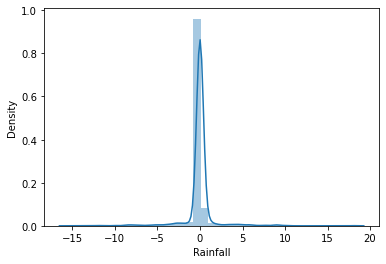

In [117]:
#checking distribution on the test dataset
sns.distplot(rf.predict(x_test) - y_test)

In [118]:
#predict the values
rfc=RandomForestRegressor()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print("Predicted Rainfall",pred)
print("actual Rainfall",y_test)

Predicted Rainfall [7.53300000e+00 7.61182651e-02 0.00000000e+00 ... 7.42800000e+00
 4.00000000e-03 5.92800000e+00]
actual Rainfall 3774    4.0
4649    0.0
6321    0.0
817     0.0
1978    3.4
       ... 
2954    0.0
259     3.2
7846    2.0
5353    0.0
2618    7.0
Name: Rainfall, Length: 1598, dtype: float64


In [119]:
df=pd.DataFrame({"Actual":y_test,"Predicted":pred})
df

,Actual,Predicted
3774,4.0,7.533000
4649,0.0,0.076118
6321,0.0,0.000000
817,0.0,0.038059
1978,3.4,4.641000
...,...,...
2954,0.0,0.004000
259,3.2,5.662000
7846,2.0,7.428000
5353,0.0,0.004000


Conclusion:we are getting RandomForestRegressor accuracy)score as 87% so we accept this model

# Saving the Model

In [120]:
import pickle
filename='Rainfallprediction.pkl'
pickle.dump(rfc,open(filename,'wb'))
